In [2]:
#include autoreload modules for fast testing and update
%load_ext autoreload
%autoreload 2

#import relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import dateutil

#import helpers modules
# from src.data.helper_closed_transactions import date_utc


#set maximu columns display pandas
pd.options.display.max_columns = 50

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Check the differences between old and new data types

**OLD DATA TYPE**

In [3]:
df_old=pd.read_csv(
    "../data/external/EPEX_spot_continous_2019/DE Continuous Orders 2019-10/DE Continuous Orders 20191001.csv",
    sep=';', 
    decimal=',',
    nrows=100)

In [4]:
df_old.head()

,Order ID,Initial ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Delivery Instrument,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Unnamed: 17
0,10523814627,10523814627,NaN,30/09/2019 15:00:02.488,30/09/2019 15:00:24.095,30/09/2019 15:00:24.097,01/10/2019,Hour,05:00,N,DE-AMP,B,-199.00,5.4,0,NaN,0,NaN
1,10523814628,10523814628,NaN,30/09/2019 15:00:02.488,30/09/2019 15:00:24.095,30/09/2019 15:00:24.097,01/10/2019,Hour,05:00,N,DE-AMP,B,-199.00,5.2,0,NaN,0,NaN
2,10523814629,10523814629,NaN,30/09/2019 15:00:02.488,30/09/2019 15:00:24.095,30/09/2019 15:00:24.097,01/10/2019,Hour,05:00,N,DE-AMP,S,199.00,5.5,0,NaN,0,NaN
3,10523814630,10523814630,NaN,30/09/2019 15:00:02.488,30/09/2019 15:00:24.095,30/09/2019 15:00:24.097,01/10/2019,Hour,05:00,N,DE-AMP,S,199.00,5.3,0,NaN,0,NaN
4,10523814686,10523814686,NaN,30/09/2019 15:00:05.586,30/09/2019 15:00:18.558,30/09/2019 15:00:18.557,01/10/2019,Hour,01:00,N,DE-AMP,B,8.09,5.0,0,NaN,0,NaN


**NEW DATA TYPE**

In [5]:
df_new=pd.read_csv(
    "../data/external/EPEX_spot_continous_2019/Continuous_Orders_DE_201912_20200130T135223Z/Continuous_Orders_DE_20191201_20200130T135223Z.csv",
    sep=';', 
    decimal=',',
    nrows=100)

In [6]:
df_new.head()

,Order ID,Initial ID,Parent ID,Entry time,Action code,Transaction Time,Validity time,Delivery Start,Delivery End,Product,Delivery area,Market area,Side,Price,Currency,Quantity,isOTC,RevisionNo,Is User Defined Block,Execution restriction,Unnamed: 20
0,10579992705,10579992705,NaN,2019-11-30T22:49:16.391Z,X,2019-11-30T23:00:00.006Z,2019-11-30T23:00:00Z,2019-11-30T23:45:00Z,2019-12-01T00:00:00Z,Intraday_Quarter_Hour_Power,50HzT,DE,Buy,33.20,EUR,0.5,N,2,0,NON,NaN
1,10579992718,10579992718,NaN,2019-11-30T22:49:16.391Z,X,2019-11-30T23:00:00.006Z,2019-11-30T23:00:00Z,2019-11-30T23:45:00Z,2019-12-01T00:00:00Z,Intraday_Quarter_Hour_Power,TTG,DE,Buy,33.20,EUR,0.6,N,2,0,NON,NaN
2,10579992732,10579992732,NaN,2019-11-30T22:49:16.391Z,X,2019-11-30T23:00:00.006Z,2019-11-30T23:00:00Z,2019-11-30T23:45:00Z,2019-12-01T00:00:00Z,Intraday_Quarter_Hour_Power,TNG,DE,Buy,33.20,EUR,0.9,N,2,0,NON,NaN
3,10579998716,10579998716,NaN,2019-11-30T23:00:00.122Z,A,2019-11-30T23:00:00.122Z,NaN,2019-11-30T23:45:00Z,2019-12-01T00:00:00Z,Intraday_Quarter_Hour_Power,TTG,DE,Sell,34.59,EUR,7.4,N,1,0,NON,NaN
4,10579986107,10579986107,NaN,2019-11-30T22:39:54.333Z,D,2019-11-30T23:00:00.149Z,NaN,2019-11-30T23:30:00Z,2019-11-30T23:45:00Z,Intraday_Quarter_Hour_Power,TTG,DE,Buy,30.58,EUR,2.0,N,2,0,NON,NaN


Load Continous orders in the German market for the data 01.10.2019

Function to read epex based on needs and acquired information

In [328]:
def read_epex_file(path, fast_load=False, new_data_type=False):
    
    """
    This function takes the path of the old data frame type, reads it and loads it as a dataframe
    
    Args:
        path: file location path (string)
        new_data_type: defining whether the input is a new or old data file (bool)
    Returns:
        df: read dataframe (Pandas DataFrame)
        
    """
    
    if new_data_type:
        #read first row only to get the columns name and avoid reading 'Unnamed: 20'
        cols = list(pd.read_csv(path, nrows =1, sep=';'))

        df=pd.read_csv(path, 
                       sep=';', 
                       decimal=",",
                       usecols=[i for i in cols if i!='Unnamed: 20'],
                      parse_dates=['Entry time', 'Transaction Time', 'Validity time', 'Delivery Start', 'Delivery End'],
                       date_parser=lambda col: pd.to_datetime(col, 
                                                              utc=True,
                                                              infer_datetime_format=True,
                                                             ).strftime('%Y-%m-%d %H:%M:%S.%f'),
                       nrows=None if not fast_load else 5000
                      )
        
        #rename quantity column to make it coherent with 'Volume' used in the old data format 
        df.rename(columns={'Quantity':'Volume'}, inplace=True)

        #add column combination of execution volume, time and price which allows to combine the sell and buy transaction univocally
        df['Executed Price & Volume']=list(zip(df['Price'], df['Volume'])) 
        
    else:
        #read first row only to get the columns name and avoid reading 'Unnamed: 17'
        cols = list(pd.read_csv(path, nrows =1, sep=';'))

        df=pd.read_csv(path, 
                       sep=';', 
                       decimal=",",
                       usecols=[i for i in cols if i!='Unnamed: 17'],
                      parse_dates=['Start Validity Date', 'End Validity Date', 'Cancelling Date'],
                       date_parser=lambda col: pd.to_datetime(col,
                                                            utc=True,
                                                              infer_datetime_format=True,
                                                             ).strftime('%Y-%m-%d %H:%M:%S.%f'),
                       nrows=None if not fast_load else 5000
                      )

        #change time data type
        df['Delivery Instrument']=pd.to_timedelta(df['Delivery Instrument'].apply(lambda x: x+ ':00'))
    
        df['Delivery Date']=pd.to_datetime(df['Delivery Date'], format='%d/%m/%Y')
        
        #add column combination of execution volume, time and price which allows to combine the sell and buy transaction univocally
        df['Executed Price & Volume']=list(zip(df['Execution Price'], df['Executed Volume'])) 
    
    return df

In [329]:
df_new=read_epex_file(
    "../data/external/EPEX_spot_continous_2019/Continuous_Orders_DE_201912_20200130T135223Z/Continuous_Orders_DE_20191201_20200130T135223Z.csv",
    fast_load=True,
    new_data_type=True)

In [330]:
df_new.head()

,Order ID,Initial ID,Parent ID,Entry time,Action code,Transaction Time,Validity time,Delivery Start,Delivery End,Product,Delivery area,Market area,Side,Price,Currency,Volume,isOTC,RevisionNo,Is User Defined Block,Execution restriction,Executed Price & Volume
0,10579992705,10579992705,NaN,2019-11-30 22:49:16.391,X,2019-11-30 23:00:00.006,2019-11-30 23:00:00,2019-11-30 23:45:00,2019-12-01 00:00:00,Intraday_Quarter_Hour_Power,50HzT,DE,Buy,33.20,EUR,0.5,N,2,0,NON,"(33.20, 0.5)"
1,10579992718,10579992718,NaN,2019-11-30 22:49:16.391,X,2019-11-30 23:00:00.006,2019-11-30 23:00:00,2019-11-30 23:45:00,2019-12-01 00:00:00,Intraday_Quarter_Hour_Power,TTG,DE,Buy,33.20,EUR,0.6,N,2,0,NON,"(33.20, 0.6)"
2,10579992732,10579992732,NaN,2019-11-30 22:49:16.391,X,2019-11-30 23:00:00.006,2019-11-30 23:00:00,2019-11-30 23:45:00,2019-12-01 00:00:00,Intraday_Quarter_Hour_Power,TNG,DE,Buy,33.20,EUR,0.9,N,2,0,NON,"(33.20, 0.9)"
3,10579998716,10579998716,NaN,2019-11-30 23:00:00.122,A,2019-11-30 23:00:00.122,NaT,2019-11-30 23:45:00,2019-12-01 00:00:00,Intraday_Quarter_Hour_Power,TTG,DE,Sell,34.59,EUR,7.4,N,1,0,NON,"(34.59, 7.4)"
4,10579986107,10579986107,NaN,2019-11-30 22:39:54.333,D,2019-11-30 23:00:00.149,NaT,2019-11-30 23:30:00,2019-11-30 23:45:00,Intraday_Quarter_Hour_Power,TTG,DE,Buy,30.58,EUR,2.0,N,2,0,NON,"(30.58, 2.0)"


In [327]:
df_new.columns

Index(['Order ID', 'Initial ID', 'Parent ID', 'Entry time', 'Action code',
       'Transaction Time', 'Validity time', 'Delivery Start', 'Delivery End',
       'Product', 'Delivery area', 'Market area', 'Side', 'Price', 'Currency',
       'Quantity', 'isOTC', 'RevisionNo', 'Is User Defined Block',
       'Execution restriction', 'Executed Price & Volume', 'lead_time'],
      dtype='object')

In [305]:
df=read_epex_file(
    "../data/external/EPEX_spot_continous_2019/DE Continuous Orders 2019-10/DE Continuous Orders 20191001.csv",
    fast_load=False)

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Order ID                 5000 non-null   int64          
 1   Initial ID               5000 non-null   int64          
 2   Parent ID                4444 non-null   float64        
 3   Start Validity Date      5000 non-null   datetime64[ns] 
 4   End Validity Date        5000 non-null   datetime64[ns] 
 5   Cancelling Date          3015 non-null   datetime64[ns] 
 6   Delivery Date            5000 non-null   datetime64[ns] 
 7   Instrument Type          5000 non-null   object         
 8   Delivery Instrument      5000 non-null   timedelta64[ns]
 9   Is block                 5000 non-null   object         
 10  Area                     5000 non-null   object         
 11  Side                     5000 non-null   object         
 12  Price               

In [287]:
df.head()

,Order ID,Initial ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Delivery Instrument,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Executed Price & Volume
0,10523814627,10523814627,NaN,2019-09-30 15:00:02.488,2019-09-30 15:00:24.095,2019-09-30 15:00:24.097,2019-10-01,Hour,0 days 05:00:00,N,DE-AMP,B,-199.00,5.4,0,NaN,0,"(nan, 0)"
1,10523814628,10523814628,NaN,2019-09-30 15:00:02.488,2019-09-30 15:00:24.095,2019-09-30 15:00:24.097,2019-10-01,Hour,0 days 05:00:00,N,DE-AMP,B,-199.00,5.2,0,NaN,0,"(nan, 0)"
2,10523814629,10523814629,NaN,2019-09-30 15:00:02.488,2019-09-30 15:00:24.095,2019-09-30 15:00:24.097,2019-10-01,Hour,0 days 05:00:00,N,DE-AMP,S,199.00,5.5,0,NaN,0,"(nan, 0)"
3,10523814630,10523814630,NaN,2019-09-30 15:00:02.488,2019-09-30 15:00:24.095,2019-09-30 15:00:24.097,2019-10-01,Hour,0 days 05:00:00,N,DE-AMP,S,199.00,5.3,0,NaN,0,"(nan, 0)"
4,10523814686,10523814686,NaN,2019-09-30 15:00:05.586,2019-09-30 15:00:18.558,2019-09-30 15:00:18.557,2019-10-01,Hour,0 days 01:00:00,N,DE-AMP,B,8.09,5.0,0,NaN,0,"(nan, 0)"


### Data Inspection

In [52]:
df['Unnamed: 17'].unique()

array([nan])

Investigating Headers names

In [7]:
df['Instrument Type'].unique()

array(['Hour', 'Quarter Hour', 'Half Hour'], dtype=object)

Is block gives information of whether the contract has to be executed in block at the proposed price.

In [35]:
df['Is block'].unique()

array(['N', 'Y'], dtype=object)

In [31]:
df[(df['Price'].astype('int')==-199)
   &(df['Is Executed']==1)
  ]

,Order ID,Initial ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Delivery Instrument,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Executed Price & Volume


In [66]:
df[df['Order ID']!=df['Initial ID']]

,Order ID,Initial ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Delivery Instrument,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Unnamed: 17
115,10523815214,10523815045,1.052382e+10,30/09/2019 15:00:15.141,30/09/2019 15:00:24.487,30/09/2019 15:00:24.487,01/10/2019,Hour,05:00,N,DE-50Hz,S,55.12,10.000,0,NaN,0.000,NaN
159,10523815311,10523815290,1.052382e+10,30/09/2019 15:00:17.124,30/09/2019 16:04:24.823,30/09/2019 16:04:24.823,01/10/2019,Hour,09:00,N,DE-AMP,B,46.11,5.000,0,NaN,0.000,NaN
160,10523815312,10523815283,1.052382e+10,30/09/2019 15:00:17.124,30/09/2019 16:09:49.998,30/09/2019 16:09:49.997,01/10/2019,Hour,02:00,N,DE-AMP,B,26.61,5.000,0,NaN,0.000,NaN
161,10523815313,10523815282,1.052382e+10,30/09/2019 15:00:17.124,30/09/2019 15:02:14.470,30/09/2019 15:02:14.470,01/10/2019,Hour,01:00,N,DE-AMP,B,28.11,5.000,0,NaN,0.000,NaN
162,10523815314,10523815285,1.052382e+10,30/09/2019 15:00:17.124,30/09/2019 15:32:02.736,30/09/2019 15:32:02.737,01/10/2019,Hour,04:00,N,DE-AMP,B,25.21,5.000,0,NaN,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017592,10525113466,10525098727,1.052511e+10,01/10/2019 23:39:42.796,01/10/2019 23:39:52.804,01/10/2019 23:39:52.803,01/10/2019,Quarter Hour,24:00,N,DE-AMP,S,14.93,1.225,0,NaN,0.000,NaN
1017594,10525113510,10525098727,1.052511e+10,01/10/2019 23:39:52.804,01/10/2019 23:40:00.000,01/10/2019 23:40:00.000,01/10/2019,Quarter Hour,24:00,N,DE-AMP,S,14.91,1.225,0,NaN,0.000,NaN
1017596,10525113516,10525112370,1.052511e+10,01/10/2019 23:39:54.269,01/10/2019 23:39:54.269,NaN,01/10/2019,Quarter Hour,24:00,N,DE-TPS,B,1000.00,0.225,1,10.0,0.225,NaN
1017598,10525113520,10525112546,1.052511e+10,01/10/2019 23:39:54.833,01/10/2019 23:39:59.927,01/10/2019 23:39:59.927,01/10/2019,Quarter Hour,24:00,N,DE-50Hz,B,-8.65,1.250,0,NaN,0.000,NaN


<AxesSubplot:>

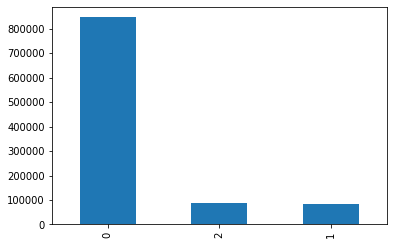

In [71]:
df['Is Executed'].value_counts().plot(kind='bar')

### Data Manipulation and Transactions Matching

Function to filter all orders based on the lead time and whether they had been filtered or not.

In [364]:
def filter_lead_time(df, new_data_type=False):
    
    """
    
    This function filters the LOB dataframe for the orders with a lead time which is relevant for the investigation
    
    Args:
        df: LOB dataframe (Pandas DataFrame)
        new_data_type: defining whether the input is a new or old data file (bool)
    Return:
        df_filtered: dataframe with filtered LOB (Pandas DataFrame)
    
    """
    
    if new_data_type:
        
        #create the lead time column
        df['lead_time']=df['Delivery Start']-df['Transaction Time']
        
        #define logical statement to filter rows based on lead time
        logical_statement_lead_time=(df['lead_time'].dt.total_seconds()/60>=30) & (df['lead_time'].dt.total_seconds()/60<=60)
        
        #filter the dataframe based on logical statement
        df_filtered=df[logical_statement_lead_time]
        
        #define logical statement to filter rows based on execution
        logical_statement_execution=(df_filtered['Action code']=='M') | (df_filtered['Action code']=='P')

        #filter the dataframe based on logical statement
        df_filtered=df_filtered[logical_statement_execution]
    
    else:
        
    
        #create the lead time column
        df['lead_time']=df['Delivery Date']+df['Delivery Instrument']-df['Start Validity Date']
        
        #define logical statement to filter rows based on lead time
        logical_statement_lead_time=(df['lead_time'].dt.total_seconds()/60>=30) & (df['lead_time'].dt.total_seconds()/60<=60)

        #filter the dataframe based on logical statement
        df_filtered=df[logical_statement_lead_time]

        #define logical statement to filter rows based on execution
        logical_statement_execution=df_filtered['Is Executed']!=0

        #filter the dataframe based on logical statement
        df_filtered=df_filtered[logical_statement_execution]
    
    
    return df_filtered
    

Filter for timewindow required

In [365]:
df_filtered_new=filter_lead_time(df_new, new_data_type=True)

In [306]:
df_filtered=filter_lead_time(df)

In [319]:
df_filtered

,Order ID,Initial ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Delivery Instrument,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Executed Price & Volume,lead_time
138463,10524149312,10524149312,NaN,2019-09-30 23:19:15.484,2019-09-30 23:19:15.484,NaT,2019-10-01,Quarter Hour,0 days 00:15:00,N,DE-TPS,S,35.62,0.225,1,35.62,0.225,"(35.62, 0.225)",0 days 00:55:44.516000
138464,10524149312,10524149312,NaN,2019-09-30 23:19:02.587,2019-09-30 23:19:15.484,NaT,2019-10-01,Quarter Hour,0 days 00:15:00,N,DE-TPS,S,35.62,0.300,2,35.62,0.075,"(35.62, 0.075)",0 days 00:55:57.413000
141734,10524153131,10524153131,NaN,2019-09-30 23:54:03.373,2019-09-30 23:54:04.068,NaT,2019-10-01,Quarter Hour,0 days 00:30:00,N,DE-50Hz,S,43.00,1.275,2,43.00,0.200,"(43.0, 0.2)",0 days 00:35:56.627000
141736,10524153131,10524153131,NaN,2019-09-30 23:54:40.120,2019-09-30 23:55:00.907,NaT,2019-10-01,Quarter Hour,0 days 00:30:00,N,DE-50Hz,S,43.00,0.925,2,43.00,0.675,"(43.0, 0.675)",0 days 00:35:19.880000
141737,10524153131,10524153131,NaN,2019-09-30 23:54:04.068,2019-09-30 23:54:40.120,NaT,2019-10-01,Quarter Hour,0 days 00:30:00,N,DE-50Hz,S,43.00,1.075,2,43.00,0.150,"(43.0, 0.15)",0 days 00:35:55.932000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167220,10524178995,10524178995,NaN,2019-09-30 23:58:56.158,2019-01-10 00:04:40.130,NaT,2019-10-01,Quarter Hour,0 days 00:45:00,N,DE-TPS,B,35.08,0.100,1,35.08,0.100,"(35.08, 0.1)",0 days 00:46:03.842000
167231,10524179006,10524173873,1.052418e+10,2019-09-30 23:59:00.429,2019-09-30 23:59:00.429,NaT,2019-10-01,Quarter Hour,0 days 00:45:00,N,DE-ENBW,B,43.40,0.200,1,43.00,0.200,"(43.0, 0.2)",0 days 00:45:59.571000
167232,10524179006,10524173873,1.052418e+10,2019-09-30 23:59:00.429,2019-09-30 23:59:00.429,NaT,2019-10-01,Quarter Hour,0 days 00:45:00,N,DE-ENBW,B,43.40,0.275,2,42.90,0.075,"(42.9, 0.075)",0 days 00:45:59.571000
167233,10524179007,10524178977,1.052418e+10,2019-09-30 23:59:00.429,2019-09-30 23:59:00.429,NaT,2019-10-01,Quarter Hour,0 days 00:45:00,N,DE-50Hz,B,43.40,0.025,1,43.00,0.025,"(43.0, 0.025)",0 days 00:45:59.571000


Check price and execution price difference

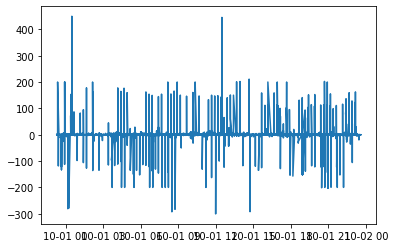

In [87]:
plt.plot(df_filtered['End Validity Date'],df_filtered['Price']-df_filtered['Execution Price'])

In [88]:
df_filtered[abs(df_filtered['Price']-df_filtered['Execution Price'])>100]

,Order ID,Initial ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Delivery Instrument,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Executed Price & Volume,lead_time
144985,10524156151,10524147447,1.052415e+10,2019-09-30 23:21:28.649,2019-09-30 23:21:28.649,NaT,2019-10-01,Quarter Hour,0 days 00:15:00,N,DE-50Hz,B,238.68,0.675,1,38.68,0.675,"(38.68, 0.675)",0 days 00:53:31.351000
144986,10524156151,10524147447,1.052415e+10,2019-09-30 23:21:28.649,2019-09-30 23:21:28.649,NaT,2019-10-01,Quarter Hour,0 days 00:15:00,N,DE-50Hz,B,238.68,0.750,2,38.67,0.075,"(38.67, 0.075)",0 days 00:53:31.351000
147005,10524158251,10524157410,1.052416e+10,2019-09-30 23:24:59.417,2019-09-30 23:24:59.417,NaT,2019-10-01,Quarter Hour,0 days 00:15:00,N,DE-TPS,S,-80.00,0.075,1,38.60,0.075,"(38.6, 0.075)",0 days 00:50:00.583000
156588,10524168908,10524168908,NaN,2019-09-30 23:39:59.518,2019-09-30 23:39:59.518,NaT,2019-10-01,Quarter Hour,0 days 00:15:00,N,DE-AMP,S,-100.00,0.025,1,22.31,0.025,"(22.31, 0.025)",0 days 00:35:00.482000
156591,10524168911,10524168911,NaN,2019-09-30 23:39:59.577,2019-09-30 23:39:59.577,NaT,2019-10-01,Quarter Hour,0 days 00:15:00,N,DE-50Hz,S,-100.00,0.075,1,33.00,0.075,"(33.0, 0.075)",0 days 00:35:00.423000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006833,10525081947,10525080842,1.052508e+10,2019-10-01 22:40:00.955,2019-10-01 22:40:00.955,NaT,2019-10-01,Quarter Hour,0 days 23:30:00,N,DE-TPS,B,200.00,0.025,1,40.39,0.025,"(40.39, 0.025)",0 days 00:49:59.045000
1012153,10525090159,10525090117,1.052509e+10,2019-10-01 22:53:22.697,2019-10-01 22:53:22.697,NaT,2019-10-01,Quarter Hour,0 days 23:45:00,N,DE-TPS,B,155.00,0.100,1,26.74,0.100,"(26.74, 0.1)",0 days 00:51:37.303000
1012562,10525091067,10525090219,1.052509e+10,2019-10-01 22:54:59.663,2019-10-01 22:54:59.663,NaT,2019-10-01,Quarter Hour,0 days 23:45:00,N,DE-TPS,S,-80.00,0.200,1,25.61,0.200,"(25.61, 0.2)",0 days 00:50:00.337000
1014058,10525096069,10525096069,NaN,2019-10-01 23:08:21.665,2019-10-01 23:08:21.665,NaT,2019-10-01,Quarter Hour,1 days 00:00:00,N,DE-TPS,B,155.00,0.125,1,32.60,0.125,"(32.6, 0.125)",0 days 00:51:38.335000


As it can be seen the number of transactions decreased dramatically.

In [22]:
df_filtered.shape

(22773, 19)

In [122]:
df_filtered

,Order ID,Initial ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Delivery Instrument,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Unnamed: 17,lead_time,g,Executed Price & Volume
138463,10524149312,10524149312,NaN,2019-09-30 23:19:15.484,2019-09-30 23:19:15.484,NaT,2019-10-01,Quarter Hour,0 days 00:15:00,N,DE-TPS,S,35.62,0.225,1,35.62,0.225,NaN,0 days 00:55:44.516000,0,"(35.62, 0.225)"
138464,10524149312,10524149312,NaN,2019-09-30 23:19:02.587,2019-09-30 23:19:15.484,NaT,2019-10-01,Quarter Hour,0 days 00:15:00,N,DE-TPS,S,35.62,0.300,2,35.62,0.075,NaN,0 days 00:55:57.413000,1,"(35.62, 0.075)"
141734,10524153131,10524153131,NaN,2019-09-30 23:54:03.373,2019-09-30 23:54:04.068,NaT,2019-10-01,Quarter Hour,0 days 00:30:00,N,DE-50Hz,S,43.00,1.275,2,43.00,0.200,NaN,0 days 00:35:56.627000,0,"(43.0, 0.2)"
141736,10524153131,10524153131,NaN,2019-09-30 23:54:40.120,2019-09-30 23:55:00.907,NaT,2019-10-01,Quarter Hour,0 days 00:30:00,N,DE-50Hz,S,43.00,0.925,2,43.00,0.675,NaN,0 days 00:35:19.880000,0,"(43.0, 0.675)"
141737,10524153131,10524153131,NaN,2019-09-30 23:54:04.068,2019-09-30 23:54:40.120,NaT,2019-10-01,Quarter Hour,0 days 00:30:00,N,DE-50Hz,S,43.00,1.075,2,43.00,0.150,NaN,0 days 00:35:55.932000,0,"(43.0, 0.15)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016837,10525106213,10525106213,NaN,2019-10-01 23:28:53.925,2019-10-01 23:28:53.925,NaT,2019-10-01,Quarter Hour,1 days 00:00:00,N,DE-TPS,S,18.95,2.500,2,18.95,1.250,NaN,0 days 00:31:06.075000,4,"(18.95, 1.25)"
1016838,10525106213,10525106213,NaN,2019-10-01 23:28:53.925,2019-10-01 23:28:53.925,NaT,2019-10-01,Quarter Hour,1 days 00:00:00,N,DE-TPS,S,18.95,1.250,1,18.95,1.250,NaN,0 days 00:31:06.075000,5,"(18.95, 1.25)"
1016839,10525106214,10525106214,NaN,2019-10-01 23:28:54.099,2019-10-01 23:28:54.099,NaT,2019-10-01,Quarter Hour,1 days 00:00:00,N,DE-AMP,S,19.50,1.250,1,20.00,1.250,NaN,0 days 00:31:05.901000,1,"(20.0, 1.25)"
1016840,10525106215,10525106215,NaN,2019-10-01 23:28:54.101,2019-10-01 23:28:54.101,NaT,2019-10-01,Quarter Hour,1 days 00:00:00,N,DE-AMP,S,19.50,1.250,1,20.00,1.250,NaN,0 days 00:31:05.899000,1,"(20.0, 1.25)"


Given that the orders are not cancelled, the ```End Validity Date``` of the order signal that a buy and a sell order can be matched since the end to be valid together at the same time. Orders with ```Is Executed``` categorical variable being 1 means that the orders have been executed compltely while a 2 means that orders are executed only partially.

In [311]:
df_filtered_new.head()

,Order ID,Initial ID,Parent ID,Entry time,Action code,Transaction Time,Validity time,Delivery Start,Delivery End,Product,Delivery area,Market area,Side,Price,Currency,Quantity,isOTC,RevisionNo,Is User Defined Block,Execution restriction,Executed Price & Volume,lead_time
14,10579997296,10579997296,NaN,2019-11-30 22:57:29.604,M,2019-11-30 23:00:00.876,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,50HzT,DE,Buy,34.22,EUR,0.0,N,2,0,NON,"(34.22, 0.0)",0 days 00:44:59.124000
16,10579998619,10579998619,NaN,2019-11-30 22:59:42.283,P,2019-11-30 23:00:00.876,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.93,EUR,5.9,N,2,0,NON,"(33.93, 5.9)",0 days 00:44:59.124000
18,10579998722,10579997851,1.058000e+10,2019-11-30 23:00:00.876,M,2019-11-30 23:00:00.876,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,50HzT,DE,Sell,33.40,EUR,0.0,N,3,0,IOC,"(33.40, 0.0)",0 days 00:44:59.124000
19,10579998722,10579997851,1.058000e+10,2019-11-30 23:00:00.876,P,2019-11-30 23:00:00.876,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,50HzT,DE,Sell,33.40,EUR,0.7,N,2,0,IOC,"(33.40, 0.7)",0 days 00:44:59.124000
20,10579998619,10579998619,NaN,2019-11-30 22:59:42.283,P,2019-11-30 23:00:00.881,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.93,EUR,5.1,N,3,0,NON,"(33.93, 5.1)",0 days 00:44:59.119000


In [351]:
df_new[df_new['Initial ID']==10579997851]

,Order ID,Initial ID,Parent ID,Entry time,Action code,Transaction Time,Validity time,Delivery Start,Delivery End,Product,Delivery area,Market area,Side,Price,Currency,Volume,isOTC,RevisionNo,Is User Defined Block,Execution restriction,Executed Price & Volume,lead_time
15,10579997851,10579997851,NaN,2019-11-30 22:58:09.784,D,2019-11-30 23:00:00.876,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,50HzT,DE,Sell,35.20,EUR,1.0,N,2,0,NON,"(35.20, 1.0)",0 days 00:44:59.124000
17,10579998722,10579997851,1.058000e+10,2019-11-30 23:00:00.876,A,2019-11-30 23:00:00.876,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,50HzT,DE,Sell,33.40,EUR,0.8,N,1,0,IOC,"(33.40, 0.8)",0 days 00:44:59.124000
18,10579998722,10579997851,1.058000e+10,2019-11-30 23:00:00.876,M,2019-11-30 23:00:00.876,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,50HzT,DE,Sell,33.40,EUR,0.0,N,3,0,IOC,"(33.40, 0.0)",0 days 00:44:59.124000
19,10579998722,10579997851,1.058000e+10,2019-11-30 23:00:00.876,P,2019-11-30 23:00:00.876,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,50HzT,DE,Sell,33.40,EUR,0.7,N,2,0,IOC,"(33.40, 0.7)",0 days 00:44:59.124000


In [353]:
df_filtered_new[df_filtered_new['Initial ID']==10579997851]

,Order ID,Initial ID,Parent ID,Entry time,Action code,Transaction Time,Validity time,Delivery Start,Delivery End,Product,Delivery area,Market area,Side,Price,Currency,Volume,isOTC,RevisionNo,Is User Defined Block,Execution restriction,Executed Price & Volume,lead_time
18,10579998722,10579997851,1.058000e+10,2019-11-30 23:00:00.876,M,2019-11-30 23:00:00.876,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,50HzT,DE,Sell,33.40,EUR,0.0,N,3,0,IOC,"(33.40, 0.0)",0 days 00:44:59.124000
19,10579998722,10579997851,1.058000e+10,2019-11-30 23:00:00.876,P,2019-11-30 23:00:00.876,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,50HzT,DE,Sell,33.40,EUR,0.7,N,2,0,IOC,"(33.40, 0.7)",0 days 00:44:59.124000


In [354]:
df_new[df_new['Initial ID']==10579997296]

,Order ID,Initial ID,Parent ID,Entry time,Action code,Transaction Time,Validity time,Delivery Start,Delivery End,Product,Delivery area,Market area,Side,Price,Currency,Volume,isOTC,RevisionNo,Is User Defined Block,Execution restriction,Executed Price & Volume,lead_time
14,10579997296,10579997296,NaN,2019-11-30 22:57:29.604,M,2019-11-30 23:00:00.876,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,50HzT,DE,Buy,34.22,EUR,0.0,N,2,0,NON,"(34.22, 0.0)",0 days 00:44:59.124000


In [355]:
df_new[df_new['Initial ID']==10579998619]

,Order ID,Initial ID,Parent ID,Entry time,Action code,Transaction Time,Validity time,Delivery Start,Delivery End,Product,Delivery area,Market area,Side,Price,Currency,Volume,isOTC,RevisionNo,Is User Defined Block,Execution restriction,Executed Price & Volume,lead_time
16,10579998619,10579998619,NaN,2019-11-30 22:59:42.283,P,2019-11-30 23:00:00.876,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.93,EUR,5.9,N,2,0,NON,"(33.93, 5.9)",0 days 00:44:59.124000
20,10579998619,10579998619,NaN,2019-11-30 22:59:42.283,P,2019-11-30 23:00:00.881,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.93,EUR,5.1,N,3,0,NON,"(33.93, 5.1)",0 days 00:44:59.119000
3407,10579998619,10579998619,NaN,2019-11-30 22:59:42.283,D,2019-11-30 23:06:47.110,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.93,EUR,5.1,N,4,0,NON,"(33.93, 5.1)",0 days 00:38:12.890000


In [356]:
df_new[df_new['Initial ID']==10579999322]

,Order ID,Initial ID,Parent ID,Entry time,Action code,Transaction Time,Validity time,Delivery Start,Delivery End,Product,Delivery area,Market area,Side,Price,Currency,Volume,isOTC,RevisionNo,Is User Defined Block,Execution restriction,Executed Price & Volume,lead_time
1104,10579999322,10579999322,NaN,2019-11-30 23:01:28.491,M,2019-11-30 23:01:28.491,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,TTG,DE,Sell,33.41,EUR,0.0,N,2,0,IOC,"(33.41, 0.0)",0 days 00:43:31.509000
1105,10579999322,10579999322,NaN,2019-11-30 23:01:28.491,A,2019-11-30 23:01:28.491,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,TTG,DE,Sell,33.41,EUR,0.5,N,1,0,IOC,"(33.41, 0.5)",0 days 00:43:31.509000


In [357]:
df_new[df_new['Initial ID']==10579990676] 

,Order ID,Initial ID,Parent ID,Entry time,Action code,Transaction Time,Validity time,Delivery Start,Delivery End,Product,Delivery area,Market area,Side,Price,Currency,Volume,isOTC,RevisionNo,Is User Defined Block,Execution restriction,Executed Price & Volume,lead_time
381,10579998596,10579990676,1.058000e+10,2019-11-30 22:59:39.149,D,2019-11-30 23:00:09.801,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.92,EUR,4.9,N,2,0,NON,"(33.92, 4.9)",0 days 00:44:50.199000
382,10579998872,10579990676,1.058000e+10,2019-11-30 23:00:09.801,A,2019-11-30 23:00:09.801,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.94,EUR,4.9,N,1,0,NON,"(33.94, 4.9)",0 days 00:44:50.199000
626,10579998872,10579990676,1.058000e+10,2019-11-30 23:00:09.801,P,2019-11-30 23:00:25.567,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.94,EUR,3.1,N,2,0,NON,"(33.94, 3.1)",0 days 00:44:34.433000
629,10579998872,10579990676,1.058000e+10,2019-11-30 23:00:09.801,P,2019-11-30 23:00:25.889,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.94,EUR,2.3,N,3,0,NON,"(33.94, 2.3)",0 days 00:44:34.111000
866,10579998872,10579990676,1.058000e+10,2019-11-30 23:00:09.801,D,2019-11-30 23:00:56.464,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.94,EUR,2.3,N,4,0,NON,"(33.94, 2.3)",0 days 00:44:03.536000
867,10579999175,10579990676,1.058000e+10,2019-11-30 23:00:56.464,A,2019-11-30 23:00:56.464,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.94,EUR,4.9,N,1,0,NON,"(33.94, 4.9)",0 days 00:44:03.536000
1099,10579999175,10579990676,1.058000e+10,2019-11-30 23:00:56.464,P,2019-11-30 23:01:28.477,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.94,EUR,4.4,N,2,0,NON,"(33.94, 4.4)",0 days 00:43:31.523000
1103,10579999175,10579990676,1.058000e+10,2019-11-30 23:00:56.464,P,2019-11-30 23:01:28.491,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.94,EUR,3.9,N,3,0,NON,"(33.94, 3.9)",0 days 00:43:31.509000
1300,10579999175,10579990676,1.058000e+10,2019-11-30 23:00:56.464,D,2019-11-30 23:01:59.027,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.94,EUR,3.9,N,4,0,NON,"(33.94, 3.9)",0 days 00:43:00.973000
1301,10579999446,10579990676,1.058000e+10,2019-11-30 23:01:59.027,A,2019-11-30 23:01:59.027,NaT,2019-11-30 23:45:00,2019-12-01,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.94,EUR,4.9,N,1,0,NON,"(33.94, 4.9)",0 days 00:43:00.973000


In [342]:
def extract_transactions(df_filtered, new_data_type=False):
    
    """
    
    This function filters extract the completed transactions from the filtered LOB dataframe
    
    Args:
        df_filtered: filtered LOB dataframe (Pandas DataFrame)
        new_data_type: defining whether the input is a new or old data file (bool)
    Return:
        pivoted: pivoted table showing transactions for confy visualization (Pandas DataFrame)
        pivoted_levels: pivoted table showing transactions for further analysis (Pandas DataFrame)
    """
    if new_data_type:
        
        #table view with transactions buy and sell side showing row wise
        pivoted=pd.pivot_table(df_filtered, 
                   values=['Price', 'Volume', 'Initial ID', 'Order ID', 'Parent ID', 'Action code', 'Market area', 'Entry time','Execution restriction','lead_time'],
                   index=['Transaction Time', 'Executed Price & Volume', 'Side'], 
                   aggfunc=list,
                  ).apply(pd.Series.explode).sort_index()

        #table view with transactions indexed only for datetime and execution price adn volumes
        pivoted_levels=pd.merge(pivoted.query("Side == 'Buy'").reset_index(level=2, drop=True), 
             pivoted.query("Side == 'Sell'").reset_index(level=2, drop=True), 
             left_index=True, 
             right_index=True,
            suffixes=('_B', '_S'))
        
    
    else:
        
    
        #table view with transactions buy and sell side showing row wise
        pivoted=pd.pivot_table(df_filtered, 
                   values=['Price', 'Volume', 'Initial ID', 'Order ID', 'Parent ID', 'Is Executed', 'Execution Price', 'Executed Volume','lead_time'],
                   index=['End Validity Date', 'Executed Price & Volume', 'Side'], 
                   aggfunc=list,
                  ).apply(pd.Series.explode).sort_index()

        #table view with transactions indexed only for datetime and execution price adn volumes
        pivoted_levels=pd.merge(pivoted.query("Side == 'B'").reset_index(level=2, drop=True), 
             pivoted.query("Side == 'S'").reset_index(level=2, drop=True), 
             left_index=True, 
             right_index=True,
            suffixes=('_B', '_S'))
    
    return pivoted, pivoted_levels

In [337]:
pivoted, pivoted_levels=extract_transactions(df_filtered, new_data_type=False)

In [369]:
pivoted.head()

Executed Volume  \
End Validity Date       Executed Price & Volume Side                   
2019-01-10 00:03:05.922 (39.0, 1.25)            B               1.25   
2019-01-10 00:04:40.130 (35.08, 0.1)            B                0.1   
2019-01-10 00:05:10.224 (37.53, 1.075)          B              1.075   
                        (38.0, 1.0)             B                  1   
                        (38.0, 1.25)            B               1.25   

                                                     Execution Price  \
End Validity Date       Executed Price & Volume Side                   
2019-01-10 00:03:05.922 (39.0, 1.25)            B                 39   
2019-01-10 00:04:40.130 (35.08, 0.1)            B              35.08   
2019-01-10 00:05:10.224 (37.53, 1.075)          B              37.53   
                        (38.0, 1.0)             B                 38   
                        (38.0, 1.25)            B                 38   

                                                       Initial ID Is Executed  \
End Validity Date       Executed Price & Volume Side                            
2019-01-10 00:03:05.922 (39.0, 1.25)            B     10524178326           1   
2019-01-10 00:04:40.130 (35.08, 0.1)            B     10524178995           1   
2019-01-10 00:05:10.224 (37.53, 1.075)          B     10524177639           1   
                        (38.0, 1.0)             B     10524178277           1   
                        (38.0, 1.25)            B     10524179074           2   

                                                         Order ID  \
End Validity Date       Executed Price & Volume Side                
2019-01-10 00:03:05.922 (39.0, 1.25)            B     10524178326   
2019-01-10 00:04:40.130 (35.08, 0.1)            B     10524178995   
2019-01-10 00:05:10.224 (37.53, 1.075)          B     10524178297   
                        (38.0, 1.0)             B     10524178277   
                        (38.0, 1.25)            B     10524179074   

                                                        Parent ID  Price  \
End Validity Date       Executed Price & Volume Side                       
2019-01-10 00:03:05.922 (39.0, 1.25)            B             NaN     39   
2019-01-10 00:04:40.130 (35.08, 0.1)            B             NaN  35.08   
2019-01-10 00:05:10.224 (37.53, 1.075)          B     1.05242e+10  37.53   
                        (38.0, 1.0)             B             NaN     38   
                        (38.0, 1.25)            B             NaN     38   

                                                     Volume  \
End Validity Date       Executed Price & Volume Side          
2019-01-10 00:03:05.922 (39.0, 1.25)            B      1.25   
2019-01-10 00:04:40.130 (35.08, 0.1)            B       0.1   
2019-01-10 00:05:10.224 (37.53, 1.075)          B     1.075   
                        (38.0, 1.0)             B         1   
                        (38.0, 1.25)            B      1.25   

                                                                  lead_time  
End Validity Date       Executed Price & Volume Side                         
2019-01-10 00:03:05.922 (39.0, 1.25)            B    0 days 00:33:12.653000  
2019-01-10 00:04:40.130 (35.08, 0.1)            B    0 days 00:46:03.842000  
2019-01-10 00:05:10.224 (37.53, 1.075)          B    0 days 00:33:15.653000  
                        (38.0, 1.0)             B    0 days 00:33:17.456000  
                        (38.0, 1.25)            B    0 days 00:30:42.956000

In [368]:
pivoted_levels

Executed Volume_B  \
End Validity Date       Executed Price & Volume                     
2019-09-30 23:16:56.314 (34.4, 0.25)                         0.25   
                        (34.52, 0.2)                          0.2   
                        (34.6, 0.05)                         0.05   
2019-09-30 23:16:56.398 (34.22, 0.25)                        0.25   
2019-09-30 23:17:20.690 (34.6, 0.125)                       0.125   
...                                                           ...   
2019-09-30 23:58:52.975 (35.57, 0.25)                        0.25   
2019-09-30 23:58:55.972 (34.78, 1.125)                      1.125   
2019-09-30 23:59:00.429 (42.9, 0.075)                       0.075   
                        (43.0, 0.025)                       0.025   
                        (43.0, 0.2)                           0.2   

                                                Execution Price_B  \
End Validity Date       Executed Price & Volume                     
2019-09-30 23:16:56.314 (34.4, 0.25)                         34.4   
                        (34.52, 0.2)                        34.52   
                        (34.6, 0.05)                         34.6   
2019-09-30 23:16:56.398 (34.22, 0.25)                       34.22   
2019-09-30 23:17:20.690 (34.6, 0.125)                        34.6   
...                                                           ...   
2019-09-30 23:58:52.975 (35.57, 0.25)                       35.57   
2019-09-30 23:58:55.972 (34.78, 1.125)                      34.78   
2019-09-30 23:59:00.429 (42.9, 0.075)                        42.9   
                        (43.0, 0.025)                          43   
                        (43.0, 0.2)                            43   

                                                Initial ID_B Is Executed_B  \
End Validity Date       Executed Price & Volume                              
2019-09-30 23:16:56.314 (34.4, 0.25)             10524151567             2   
                        (34.52, 0.2)             10524151567             2   
                        (34.6, 0.05)             10524151567             1   
2019-09-30 23:16:56.398 (34.22, 0.25)            10524153934             1   
2019-09-30 23:17:20.690 (34.6, 0.125)            10524154088             2   
...                                                      ...           ...   
2019-09-30 23:58:52.975 (35.57, 0.25)            10524177912             1   
2019-09-30 23:58:55.972 (34.78, 1.125)           10524172681             2   
2019-09-30 23:59:00.429 (42.9, 0.075)            10524173873             2   
                        (43.0, 0.025)            10524178977             1   
                        (43.0, 0.2)              10524173873             1   

                                                  Order ID_B  Parent ID_B  \
End Validity Date       Executed Price & Volume                             
2019-09-30 23:16:56.314 (34.4, 0.25)             10524153932  1.05242e+10   
                        (34.52, 0.2)             10524153932  1.05242e+10   
                        (34.6, 0.05)             10524153932  1.05242e+10   
2019-09-30 23:16:56.398 (34.22, 0.25)            10524153934          NaN   
2019-09-30 23:17:20.690 (34.6, 0.125)            10524154088          NaN   
...                                                      ...          ...   
2019-09-30 23:58:52.975 (35.57, 0.25)            10524178975  1.05242e+10   
2019-09-30 23:58:55.972 (34.78, 1.125)           10524178715  1.05242e+10   
2019-09-30 23:59:00.429 (42.9, 0.075)            10524179006  1.05242e+10   
                        (43.0, 0.025)            10524179007  1.05242e+10   
                        (43.0, 0.2)              10524179006  1.05242e+10   

                                                Price_B Volume_B  \
End Validity Date       Executed Price & Volume                    
2019-09-30 23:16:56.314 (34.4, 0.25)               35.4      0.5   
                        (34.52,

In [366]:
pivoted_new, pivoted_levels_new=extract_transactions(df_filtered_new, new_data_type=True)

As it can be seen below the derivation of the transactions using the new data format is not straightforward at all. The following are the issues:

- there is no clear way to define the Execution Price of a transaction
- orders which partially matched are shown without showing the actual partial volume which is matched, but instead the initial total volume. Cmpleted matched transactions are reported to have a 0 volume meaning that to know the volume matched one should look at the initial value of the order when it was added (A) to the the order book.

In [367]:
pivoted_new.head(50)

Action code  \
Transaction Time        Executed Price & Volume Side               
2019-11-30 23:00:00.876 (33.40, 0.0)            Sell           M   
                        (33.40, 0.7)            Sell           P   
                        (33.93, 5.9)            Buy            P   
                        (34.22, 0.0)            Buy            M   
2019-11-30 23:00:00.881 (33.40, 0.0)            Sell           M   
                        (33.93, 5.1)            Buy            P   
2019-11-30 23:00:25.567 (33.60, 0.0)            Sell           M   
                        (33.94, 3.1)            Buy            P   
2019-11-30 23:00:25.889 (33.60, 0.0)            Sell           M   
                        (33.94, 2.3)            Buy            P   
2019-11-30 23:01:28.477 (33.41, 0.0)            Sell           M   
                        (33.94, 4.4)            Buy            P   
2019-11-30 23:01:28.491 (33.41, 0.0)            Sell           M   
                        (33.94, 3.9)            Buy            P   
2019-11-30 23:02:34.183 (37.70, 0.0)            Sell           M   
                        (37.99, 0.0)            Sell           M   
                                                Sell           M   
                        (38.00, 1.7)            Sell           P   
                        (38.31, 0.0)            Buy            M   
                        (38.31, 3.3)            Buy            P   
                        (38.31, 3.8)            Buy            P   
                        (38.31, 5.8)            Buy            P   
2019-11-30 23:02:39.223 (33.20, 0.0)            Sell           M   
                        (33.94, 3.4)            Buy            P   
2019-11-30 23:02:39.533 (33.20, 0.0)            Sell           M   
                        (33.94, 2.5)            Buy            P   
2019-11-30 23:02:43.652 (34.49, 0.0)            Buy            M   
                                                Sell           M   
2019-11-30 23:02:43.698 (33.20, 0.0)            Sell           M   
                        (33.94, 1.8)            Buy            P   
2019-11-30 23:02:43.701 (33.20, 0.0)            Sell           M   
                        (33.94, 1.1)            Buy            P   
2019-11-30 23:02:48.678 (34.60, 0.0)            Buy            M   
                        (34.60, 2.3)            Sell           P   
2019-11-30 23:03:35.247 (33.81, 0.0)            Sell           M   
                        (33.94, 3.9)            Buy            P   
2019-11-30 23:03:35.500 (33.81, 0.0)            Sell           M   
                        (33.94, 2.5)            Buy            P   
2019-11-30 23:04:16.321 (37.60, 0.1)            Sell           P   
                        (37.60, 0.2)            Sell           P   
                        (38.20, 0.0)            Buy            M   
                                                Buy            M   
2019-11-30 23:04:36.133 (38.00, 0.0)            Sell           P   
                        (38.30, 0.0)            Buy            M   
2019-11-30 23:04:59.876 (38.13, 0.0)            Sell           M   
                        (38.13, 0.9)            Buy            P   
2019-11-30 23:04:59.878 (38.56, 0.0)            Buy            M   
                        (38.56, 5.8)            Sell           P   
2019-11-30 23:05:00.025 (37.79, 0.0)            Sell           M   
                        (38.13, 0.5)            Buy            P   

                                                                  Entry time  \
Transaction Time        Executed Price & Volume Side                           
2019-11-30 23:00:00.876 (33.40, 0.0)            Sell 2019-11-30 23:00:00.876   
                        (33.40, 0.7)            Sell 2019-11-30 23:00:00.876   
                        (33.93, 5.9)            Buy  2019-11-30 22:59:42.283   
                        (34.22, 0.0)            Buy  2019-11-30 22:57:29.604   
2019-11-30 23:00:00.881 (33.40, 0.0)

All good so far: we can match orders if, given the ```End Validity Date``` is the same, the ```Execution Price``` and the ```Executed Volume``` for buy and sell orders are the same, unless there no contract close at the same time with the condition being equal.

Also as it can be seen from above some transactions cannot be matched to their pair since the transactions of the next day have to be taken into account. Hence a the analysis will be done using everytime the dataset of two consecutive days with a rolling method.

The problem is illustrated below.

In [134]:
pivoted.tail(50)

Executed Volume  \
End Validity Date       Executed Price & Volume Side                   
2019-10-01 23:25:12.517 (19.8, 0.05)            B               0.05   
                                                S               0.05   
2019-10-01 23:25:29.086 (20.0, 0.25)            B               0.25   
                                                S               0.25   
2019-10-01 23:26:33.963 (19.8, 1.25)            B               1.25   
                                                S               1.25   
2019-10-01 23:26:36.607 (19.8, 1.2)             B                1.2   
                                                S                1.2   
2019-10-01 23:26:50.998 (19.8, 1.225)           B              1.225   
                                                S              1.225   
                        (19.8, 1.275)           B              1.275   
                                                S              1.275   
2019-10-01 23:27:12.066 (20.07, 0.25)           B               0.25   
                                                S               0.25   
2019-10-01 23:27:48.741 (20.06, 0.25)           B               0.25   
                                                S               0.25   
2019-10-01 23:27:56.598 (19.0, 2.125)           B              2.125   
                                                S              2.125   
                        (19.0, 2.5)             B                2.5   
                                                B                2.5   
                                                S                2.5   
                                                S                2.5   
                        (19.8, 1.075)           B              1.075   
                                                S              1.075   
                        (19.8, 1.425)           B              1.425   
                                                S              1.425   
                        (20.05, 0.225)          B              0.225   
                                                S              0.225   
                        (20.06, 0.15)           B               0.15   
                                                S               0.15   
2019-10-01 23:28:08.109 (20.0, 1.0)             B                  1   
                                                S                  1   
2019-10-01 23:28:09.038 (20.0, 0.05)            B               0.05   
                                                S               0.05   
2019-10-01 23:28:10.090 (24.0, 0.25)            B               0.25   
                                                S               0.25   
2019-10-01 23:28:16.516 (25.67, 1.25)           B               1.25   
                                                S               1.25   
2019-10-01 23:28:53.925 (18.95, 1.25)           B               1.25   
                                                B               1.25   
                                                S               1.25   
                                                S               1.25   
                        (19.34, 1.25)           B               1.25   
                                                S               1.25   
2019-10-01 23:28:54.099 (20.0, 1.25)            B               1.25   
                                                S               1.25   
2019-10-01 23:28:54.101 (20.0, 1.25)            B               1.25   
                                                S               1.25   
2019-10-01 23:30:01.519 (20.0, 0.075)           B              0.075   
2019-10-01 23:36:51.952 (19.8, 1.25)            B               1.25   

                                                     Execution Price  \
End Validity Date       Executed Price & Volume Side                   
2019-10-01 23:25:12.517 (19.8, 0.05)            B               19.8   
                                                S               19.8   
2019-10-01 23:25:29.

In [90]:
pivoted_levels=pd.merge(pivoted.query("Side == 'B'").reset_index(level=2, drop=True), 
         pivoted.query("Side == 'S'").reset_index(level=2, drop=True), 
         left_index=True, 
         right_index=True,
        suffixes=('_B', '_S'))

In [72]:
pivoted.head()

Executed Volume  \
End Validity Date       Executed Price & Volume Side                   
2019-09-30 23:16:56.314 (34.4, 0.25)            B               0.25   
                                                S               0.25   
                        (34.52, 0.2)            B                0.2   
                                                S                0.2   
                        (34.6, 0.05)            B               0.05   

                                                     Execution Price  \
End Validity Date       Executed Price & Volume Side                   
2019-09-30 23:16:56.314 (34.4, 0.25)            B               34.4   
                                                S               34.4   
                        (34.52, 0.2)            B              34.52   
                                                S              34.52   
                        (34.6, 0.05)            B               34.6   

                                                       Initial ID Is Executed  \
End Validity Date       Executed Price & Volume Side                            
2019-09-30 23:16:56.314 (34.4, 0.25)            B     10524151567           2   
                                                S     10524153440           1   
                        (34.52, 0.2)            B     10524151567           2   
                                                S     10524152127           1   
                        (34.6, 0.05)            B     10524151567           1   

                                                         Order ID  \
End Validity Date       Executed Price & Volume Side                
2019-09-30 23:16:56.314 (34.4, 0.25)            B     10524153932   
                                                S     10524153480   
                        (34.52, 0.2)            B     10524153932   
                                                S     10524153770   
                        (34.6, 0.05)            B     10524153932   

                                                        Parent ID  Price  \
End Validity Date       Executed Price & Volume Side                       
2019-09-30 23:16:56.314 (34.4, 0.25)            B     1.05242e+10   35.4   
                                                S     1.05242e+10   34.4   
                        (34.52, 0.2)            B     1.05242e+10   35.4   
                                                S     1.05242e+10  34.52   
                        (34.6, 0.05)            B     1.05242e+10   35.4   

                                                     Volume  
End Validity Date       Executed Price & Volume Side         
2019-09-30 23:16:56.314 (34.4, 0.25)            B       0.5  
                                                S      0.25  
                        (34.52, 0.2)            B      0.25  
                                                S       0.2  
                        (34.6, 0.05)            B      0.05

In [71]:
pivoted_levels.head()

Executed Volume_B  \
End Validity Date       Executed Price & Volume                     
2019-09-30 23:16:56.314 (34.4, 0.25)                         0.25   
                        (34.52, 0.2)                          0.2   
                        (34.6, 0.05)                         0.05   
2019-09-30 23:16:56.398 (34.22, 0.25)                        0.25   
2019-09-30 23:17:20.690 (34.6, 0.125)                       0.125   

                                                Execution Price_B  \
End Validity Date       Executed Price & Volume                     
2019-09-30 23:16:56.314 (34.4, 0.25)                         34.4   
                        (34.52, 0.2)                        34.52   
                        (34.6, 0.05)                         34.6   
2019-09-30 23:16:56.398 (34.22, 0.25)                       34.22   
2019-09-30 23:17:20.690 (34.6, 0.125)                        34.6   

                                                Initial ID_B Is Executed_B  \
End Validity Date       Executed Price & Volume                              
2019-09-30 23:16:56.314 (34.4, 0.25)             10524151567             2   
                        (34.52, 0.2)             10524151567             2   
                        (34.6, 0.05)             10524151567             1   
2019-09-30 23:16:56.398 (34.22, 0.25)            10524153934             1   
2019-09-30 23:17:20.690 (34.6, 0.125)            10524154088             2   

                                                  Order ID_B  Parent ID_B  \
End Validity Date       Executed Price & Volume                             
2019-09-30 23:16:56.314 (34.4, 0.25)             10524153932  1.05242e+10   
                        (34.52, 0.2)             10524153932  1.05242e+10   
                        (34.6, 0.05)             10524153932  1.05242e+10   
2019-09-30 23:16:56.398 (34.22, 0.25)            10524153934          NaN   
2019-09-30 23:17:20.690 (34.6, 0.125)            10524154088          NaN   

                                                Price_B Volume_B  \
End Validity Date       Executed Price & Volume                    
2019-09-30 23:16:56.314 (34.4, 0.25)               35.4      0.5   
                        (34.52, 0.2)               35.4     0.25   
                        (34.6, 0.05)               35.4     0.05   
2019-09-30 23:16:56.398 (34.22, 0.25)              35.4     0.25   
2019-09-30 23:17:20.690 (34.6, 0.125)              34.8    0.275   

                                                Executed Volume_S  \
End Validity Date       Executed Price & Volume                     
2019-09-30 23:16:56.314 (34.4, 0.25)                         0.25   
                        (34.52, 0.2)                          0.2   
                        (34.6, 0.05)                         0.05   
2019-09-30 23:16:56.398 (34.22, 0.25)                        0.25   
2019-09-30 23:17:20.690 (34.6, 0.125)                       0.125   

                                                Execution Price_S  \
End Validity Date       Executed Price & Volume                     
2019-09-30 23:16:56.314 (34.4, 0.25)                         34.4   
                        (34.52, 0.2)                        34.52   
                        (34.6, 0.05)                         34.6   
2019-09-30 23:16:56.398 (34.22, 0.25)                       34.22   
2019-09-30 23:17:20.690 (34.6, 0.125)                        34.6   

                                                Initial ID_S Is Executed_S  \
End Validity Date       Executed Price & Volume                              
2019-09-30 23:16:56.314 (34.4, 0.25)             10524153440             1   
                        (34.52, 0.2)             10524152127             1   
                        (34.6, 0.05)             10524152775             2   
2019-09-30 23:16:56.398 (34.22, 0.25)            10524153933             1   
2019-09-30 23:17:20.690 (34.6, 0.125)            10524153936             1   

 

In [83]:
pivoted_levels[pivoted_levels['Price_S']-pivoted_levels['Price_B']>0]

,,Executed Volume_B,Execution Price_B,Initial ID_B,Is Executed_B,Order ID_B,Parent ID_B,Price_B,Volume_B,Executed Volume_S,Execution Price_S,Initial ID_S,Is Executed_S,Order ID_S,Parent ID_S,Price_S,Volume_S
End Validity Date,Executed Price & Volume,,,,,,,,,,,,,,,,


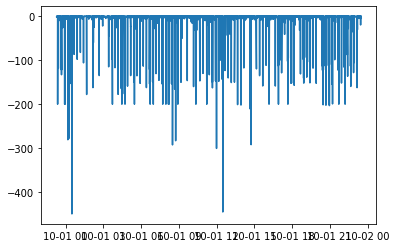

In [91]:
plt.plot(pivoted_levels.reset_index()['End Validity Date'],pivoted_levels['Price_S']-pivoted_levels['Price_B'])

In [40]:
pivoted[abs(pivoted['Price']-pivoted['Execution Price'])>100]

Executed Volume  \
End Validity Date       Executed Price & Volume Side                   
2019-09-30 23:21:28.649 (38.67, 0.075)          B              0.075   
                        (38.68, 0.675)          B              0.675   
2019-09-30 23:24:59.417 (38.6, 0.075)           S              0.075   
2019-09-30 23:39:59.518 (22.31, 0.025)          S              0.025   
2019-09-30 23:39:59.577 (33.0, 0.075)           S              0.075   
...                                                              ...   
2019-10-01 22:40:00.955 (40.39, 0.025)          B              0.025   
2019-10-01 22:53:22.697 (26.74, 0.1)            B                0.1   
2019-10-01 22:54:59.663 (25.61, 0.2)            S                0.2   
2019-10-01 23:08:21.665 (32.6, 0.125)           B              0.125   
2019-10-01 23:09:59.664 (37.57, 0.2)            B                0.2   

                                                     Execution Price  \
End Validity Date       Executed Price & Volume Side                   
2019-09-30 23:21:28.649 (38.67, 0.075)          B              38.67   
                        (38.68, 0.675)          B              38.68   
2019-09-30 23:24:59.417 (38.6, 0.075)           S               38.6   
2019-09-30 23:39:59.518 (22.31, 0.025)          S              22.31   
2019-09-30 23:39:59.577 (33.0, 0.075)           S                 33   
...                                                              ...   
2019-10-01 22:40:00.955 (40.39, 0.025)          B              40.39   
2019-10-01 22:53:22.697 (26.74, 0.1)            B              26.74   
2019-10-01 22:54:59.663 (25.61, 0.2)            S              25.61   
2019-10-01 23:08:21.665 (32.6, 0.125)           B               32.6   
2019-10-01 23:09:59.664 (37.57, 0.2)            B              37.57   

                                                       Initial ID Is Executed  \
End Validity Date       Executed Price & Volume Side                            
2019-09-30 23:21:28.649 (38.67, 0.075)          B     10524147447           2   
                        (38.68, 0.675)          B     10524147447           1   
2019-09-30 23:24:59.417 (38.6, 0.075)           S     10524157410           1   
2019-09-30 23:39:59.518 (22.31, 0.025)          S     10524168908           1   
2019-09-30 23:39:59.577 (33.0, 0.075)           S     10524168911           1   
...                                                           ...         ...   
2019-10-01 22:40:00.955 (40.39, 0.025)          B     10525080842           1   
2019-10-01 22:53:22.697 (26.74, 0.1)            B     10525090117           1   
2019-10-01 22:54:59.663 (25.61, 0.2)            S     10525090219           1   
2019-10-01 23:08:21.665 (32.6, 0.125)           B     10525096069           1   
2019-10-01 23:09:59.664 (37.57, 0.2)            B     10525096136           1   

                                                         Order ID  \
End Validity Date       Executed Price & Volume Side                
2019-09-30 23:21:28.649 (38.67, 0.075)          B     10524156151   
                        (38.68, 0.675)          B     10524156151   
2019-09-30 23:24:59.417 (38.6, 0.075)           S     10524158251   
2019-09-30 23:39:59.518 (22.31, 0.025)          S     10524168908   
2019-09-30 23:39:59.577 (33.0, 0.075)           S     10524168911   
...                                                           ...   
2019-10-01 22:40:00.955 (40.39, 0.025)          B     10525081947   
2019-10-01 22:53:22.697 (26.74, 0.1)            B     10525090159   
2019-10-01 22:54:59.663 (25.61, 0.2)            S     10525091067   
2019-10-01 23:08:21.665 (32.6, 0.125)           B     10525096069   
2019-10-01 23:09:59.664 (37.57, 0.2)            B     10525096593   

                                                        Parent ID   Price  \
End Validity Date       Executed Price & Volume Side                        
2019-09-30 23:21:28.649 (38.67, 0.075)          B     1.05241e+10  238.68

### Draft Work

In [157]:
executed_1=df[df['Is Executed']==1]
executed_1

,Order ID,Initial ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Unnamed: 17,Delivery Instrument,lead_time
5421,10523823983,10523823983,NaN,2019-09-30 16:54:15.608,2019-09-30 16:56:00.885,NaT,2019-10-01,Hour,N,DE-AMP,B,50.16,1.000,1,50.16,1.000,NaN,0 days 19:00:00,1 days 02:05:44.392000
5425,10523823984,10523823984,NaN,2019-09-30 16:52:34.017,2019-09-30 16:56:04.531,NaT,2019-10-01,Hour,N,DE-AMP,B,54.99,1.000,1,54.99,1.000,NaN,0 days 20:00:00,1 days 03:07:25.983000
5431,10523823985,10523823985,NaN,2019-09-30 17:01:18.714,2019-09-30 17:03:03.717,NaT,2019-10-01,Hour,N,DE-AMP,B,52.92,1.100,1,52.92,1.100,NaN,0 days 21:00:00,1 days 03:58:41.286000
25938,10523828229,10523823986,1.052382e+10,2019-09-30 17:04:48.094,2019-09-30 17:13:33.100,NaT,2019-10-01,Hour,N,DE-AMP,B,52.03,0.400,1,52.03,0.400,NaN,0 days 22:00:00,1 days 04:55:11.906000
26277,10523858632,10523858632,NaN,2019-09-30 16:00:06.746,2019-09-30 16:02:20.605,NaT,2019-10-01,Quarter Hour,N,DE-AMP,S,28.35,0.750,1,28.35,0.750,NaN,0 days 06:00:00,0 days 13:59:53.254000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017445,10525112819,10525112819,NaN,2019-10-01 23:37:39.668,2019-10-01 23:37:39.668,NaT,2019-10-01,Quarter Hour,N,DE-TPS,B,9.99,1.225,1,9.99,1.225,NaN,1 days 00:00:00,0 days 00:22:20.332000
1017446,10525112821,10525112821,NaN,2019-10-01 23:37:40.176,2019-10-01 23:37:40.335,NaT,2019-10-01,Quarter Hour,N,DE-TPS,S,9.99,1.225,1,9.99,1.225,NaN,1 days 00:00:00,0 days 00:22:19.824000
1017448,10525112822,10525112822,NaN,2019-10-01 23:37:40.335,2019-10-01 23:37:40.335,NaT,2019-10-01,Quarter Hour,N,DE-TPS,B,10.00,0.025,1,10.00,0.025,NaN,1 days 00:00:00,0 days 00:22:19.665000
1017530,10525113129,10525113129,NaN,2019-10-01 23:38:41.911,2019-10-01 23:38:41.911,NaT,2019-10-01,Quarter Hour,N,DE-TPS,B,10.00,1.225,1,10.00,1.225,NaN,1 days 00:00:00,0 days 00:21:18.089000


In [158]:
executed_1.shape

(84661, 19)

In [159]:
executed_2=df[df['Is Executed']==2]
executed_2.head()

,Order ID,Initial ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Unnamed: 17,Delivery Instrument,lead_time
5411,10523823980,10523823980,NaN,2019-09-30 17:11:43.920,2019-09-30 17:13:28.920,NaT,2019-10-01,Hour,N,DE-AMP,B,39.38,0.2,2,39.38,0.2,NaN,0 days 16:00:00,0 days 22:48:16.080000
5412,10523823980,10523823980,NaN,2019-09-30 17:09:58.920,2019-09-30 17:11:43.920,NaT,2019-10-01,Hour,N,DE-AMP,B,39.38,2.3,2,39.38,2.1,NaN,0 days 16:00:00,0 days 22:50:01.080000
5413,10523823980,10523823980,NaN,2019-09-30 15:06:13.393,2019-09-30 17:09:58.920,NaT,2019-10-01,Hour,N,DE-AMP,B,39.38,5.0,2,39.38,2.7,NaN,0 days 16:00:00,1 days 00:53:46.607000
5418,10523823983,10523823983,NaN,2019-09-30 15:06:13.393,2019-09-30 16:52:30.619,NaT,2019-10-01,Hour,N,DE-AMP,B,50.16,5.0,2,50.16,3.6,NaN,0 days 19:00:00,1 days 03:53:46.607000
5419,10523823983,10523823983,NaN,2019-09-30 16:52:30.619,2019-09-30 16:54:15.608,NaT,2019-10-01,Hour,N,DE-AMP,B,50.16,1.4,2,50.16,1.4,NaN,0 days 19:00:00,1 days 02:07:29.381000


In [160]:
executed_2.shape

(86326, 19)

In [161]:
executed=pd.merge(executed_1, executed_2, on='Order ID', suffixes=('_1', '_2'))

In [213]:
buys1=executed_1[executed_1['Side']=='B']

In [214]:
sells1=executed_1[executed_1['Side']=='S']

In [215]:
# buys1.set_index('Start Validity Date', inplace=True)

In [216]:
# sells1.set_index('Start Validity Date', inplace=True)

In [217]:
sells1.head()

,Order ID,Initial ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Unnamed: 17,Delivery Instrument,lead_time
26277,10523858632,10523858632,NaN,2019-09-30 16:00:06.746,2019-09-30 16:02:20.605,NaT,2019-10-01,Quarter Hour,N,DE-AMP,S,28.35,0.75,1,28.35,0.75,NaN,0 days 06:00:00,0 days 13:59:53.254000
29809,10523866789,10523866789,NaN,2019-09-30 16:06:07.300,2019-09-30 16:06:07.300,NaT,2019-10-01,Quarter Hour,N,DE-ENBW,S,33.75,0.05,1,33.75,0.05,NaN,0 days 12:00:00,0 days 19:53:52.700000
30304,10523868457,10523840708,1.052387e+10,2019-09-30 16:07:40.764,2019-09-30 16:08:40.540,NaT,2019-10-01,Hour,N,DE-AMP,S,33.95,4.00,1,33.95,4.00,NaN,0 days 04:00:00,0 days 11:52:19.236000
30488,10523869206,10523869206,NaN,2019-09-30 16:08:47.093,2019-09-30 16:08:47.093,NaT,2019-10-01,Hour,N,DE-AMP,S,33.95,3.00,1,33.95,3.00,NaN,0 days 04:00:00,0 days 11:51:12.907000
33238,10523883455,10523883455,NaN,2019-09-30 16:26:09.587,2019-09-30 16:26:09.587,NaT,2019-10-01,Quarter Hour,N,DE-AMP,S,22.10,0.10,1,29.60,0.10,NaN,0 days 04:15:00,0 days 11:48:50.413000


In [218]:
buys1.head()

,Order ID,Initial ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Unnamed: 17,Delivery Instrument,lead_time
5421,10523823983,10523823983,NaN,2019-09-30 16:54:15.608,2019-09-30 16:56:00.885,NaT,2019-10-01,Hour,N,DE-AMP,B,50.16,1.0,1,50.16,1.0,NaN,0 days 19:00:00,1 days 02:05:44.392000
5425,10523823984,10523823984,NaN,2019-09-30 16:52:34.017,2019-09-30 16:56:04.531,NaT,2019-10-01,Hour,N,DE-AMP,B,54.99,1.0,1,54.99,1.0,NaN,0 days 20:00:00,1 days 03:07:25.983000
5431,10523823985,10523823985,NaN,2019-09-30 17:01:18.714,2019-09-30 17:03:03.717,NaT,2019-10-01,Hour,N,DE-AMP,B,52.92,1.1,1,52.92,1.1,NaN,0 days 21:00:00,1 days 03:58:41.286000
25938,10523828229,10523823986,1.052382e+10,2019-09-30 17:04:48.094,2019-09-30 17:13:33.100,NaT,2019-10-01,Hour,N,DE-AMP,B,52.03,0.4,1,52.03,0.4,NaN,0 days 22:00:00,1 days 04:55:11.906000
27127,10523860556,10523860556,NaN,2019-09-30 16:01:21.826,2019-09-30 16:01:21.826,NaT,2019-10-01,Quarter Hour,N,DE-ENBW,B,28.35,0.5,1,28.35,0.5,NaN,0 days 05:45:00,0 days 13:43:38.174000


In [221]:
matched=pd.merge(buys1, sells1, on='Execution Price', suffixes=('_buy', '_sell'))

In [222]:
matched.head()

,Order ID_buy,Initial ID_buy,Parent ID_buy,Start Validity Date_buy,End Validity Date_buy,Cancelling Date_buy,Delivery Date_buy,Instrument Type_buy,Is block_buy,Area_buy,Side_buy,Price_buy,Volume_buy,Is Executed_buy,Execution Price,Executed Volume_buy,Unnamed: 17_buy,Delivery Instrument_buy,lead_time_buy,Order ID_sell,Initial ID_sell,Parent ID_sell,Start Validity Date_sell,End Validity Date_sell,Cancelling Date_sell,Delivery Date_sell,Instrument Type_sell,Is block_sell,Area_sell,Side_sell,Price_sell,Volume_sell,Is Executed_sell,Executed Volume_sell,Unnamed: 17_sell,Delivery Instrument_sell,lead_time_sell
0,10523823983,10523823983,NaN,2019-09-30 16:54:15.608,2019-09-30 16:56:00.885,NaT,2019-10-01,Hour,N,DE-AMP,B,50.16,1.0,1,50.16,1.0,NaN,0 days 19:00:00,1 days 02:05:44.392000,10523906467,10523906467,NaN,2019-09-30 16:52:30.619,2019-09-30 16:52:30.619,NaT,2019-10-01,Hour,N,DE-50Hz,S,50.10,3.600,1,3.600,NaN,0 days 19:00:00,1 days 02:07:29.381000
1,10523823983,10523823983,NaN,2019-09-30 16:54:15.608,2019-09-30 16:56:00.885,NaT,2019-10-01,Hour,N,DE-AMP,B,50.16,1.0,1,50.16,1.0,NaN,0 days 19:00:00,1 days 02:05:44.392000,10523907666,10523907666,NaN,2019-09-30 16:54:15.608,2019-09-30 16:54:15.608,NaT,2019-10-01,Hour,N,DE-50Hz,S,50.10,1.400,1,1.400,NaN,0 days 19:00:00,1 days 02:05:44.392000
2,10523823983,10523823983,NaN,2019-09-30 16:54:15.608,2019-09-30 16:56:00.885,NaT,2019-10-01,Hour,N,DE-AMP,B,50.16,1.0,1,50.16,1.0,NaN,0 days 19:00:00,1 days 02:05:44.392000,10523909267,10523909267,NaN,2019-09-30 16:56:00.885,2019-09-30 16:56:00.885,NaT,2019-10-01,Hour,N,DE-50Hz,S,49.94,1.000,1,1.000,NaN,0 days 19:00:00,1 days 02:03:59.115000
3,10523823983,10523823983,NaN,2019-09-30 16:54:15.608,2019-09-30 16:56:00.885,NaT,2019-10-01,Hour,N,DE-AMP,B,50.16,1.0,1,50.16,1.0,NaN,0 days 19:00:00,1 days 02:05:44.392000,10524394575,10524394575,NaN,2019-10-01 06:07:50.965,2019-10-01 06:08:47.426,NaT,2019-10-01,Quarter Hour,N,DE-ENBW,S,50.16,0.175,1,0.175,NaN,0 days 08:00:00,0 days 01:52:09.035000
4,10523823983,10523823983,NaN,2019-09-30 16:54:15.608,2019-09-30 16:56:00.885,NaT,2019-10-01,Hour,N,DE-AMP,B,50.16,1.0,1,50.16,1.0,NaN,0 days 19:00:00,1 days 02:05:44.392000,10524426963,10524426963,NaN,2019-10-01 07:04:20.565,2019-10-01 07:04:20.565,NaT,2019-10-01,Quarter Hour,N,DE-TPS,S,50.14,0.475,1,0.475,NaN,0 days 08:30:00,0 days 01:25:39.435000


In [169]:
check=executed['Price_1']==executed['Execution Price_1']
check.unique()

array([ True, False])

<AxesSubplot:>

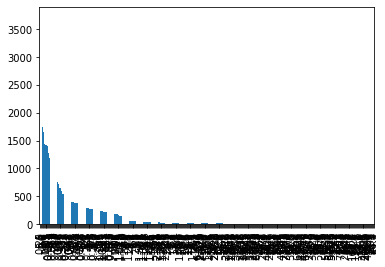

In [176]:
executed['Volume_1'].value_counts().plot(kind='bar')

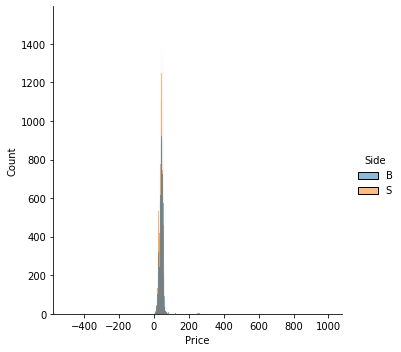

In [77]:
sbn.displot(executed_1, x='Price', hue="Side")

Plotting bids and ask 

In [72]:
df.head()

,Order ID,Initial ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Delivery Instrument,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Unnamed: 17
0,10523814627,10523814627,NaN,30/09/2019 15:00:02.488,30/09/2019 15:00:24.095,30/09/2019 15:00:24.097,01/10/2019,Hour,05:00,N,DE-AMP,B,-199.00,5.4,0,NaN,0.0,NaN
1,10523814628,10523814628,NaN,30/09/2019 15:00:02.488,30/09/2019 15:00:24.095,30/09/2019 15:00:24.097,01/10/2019,Hour,05:00,N,DE-AMP,B,-199.00,5.2,0,NaN,0.0,NaN
2,10523814629,10523814629,NaN,30/09/2019 15:00:02.488,30/09/2019 15:00:24.095,30/09/2019 15:00:24.097,01/10/2019,Hour,05:00,N,DE-AMP,S,199.00,5.5,0,NaN,0.0,NaN
3,10523814630,10523814630,NaN,30/09/2019 15:00:02.488,30/09/2019 15:00:24.095,30/09/2019 15:00:24.097,01/10/2019,Hour,05:00,N,DE-AMP,S,199.00,5.3,0,NaN,0.0,NaN
4,10523814686,10523814686,NaN,30/09/2019 15:00:05.586,30/09/2019 15:00:18.558,30/09/2019 15:00:18.557,01/10/2019,Hour,01:00,N,DE-AMP,B,8.09,5.0,0,NaN,0.0,NaN


In [ ]:
def bids_ask_plotting(start_time, end_time)

#filter time series indices by creating a mask of the necessary indices
mask=(df['time']> ) & (df['time'])

sbn.displot(executed_1, x='Price', hue="Side")


In [ ]:


#plot them
ax=df[mask].plot(x='time', y='Hydro Pumped Storage')

In [30]:
sbn.displot(data=df, x='Price', log_scale=False)

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x15170e9d0>
Traceback (most recent call last):
  File "/Users/gianlucamancini/Documents/eth_codes/case_study/case_study_2_alpiq/env/lib/python3.8/site-packages/matplotlib/transforms.py", line 200, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11a9ab280> (for post_execute):


KeyboardInterrupt: 